### Basic Operations

In [1]:
# importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# importing our dataset

raw_data=pd.read_csv('/Users/adityabanerjee/Documents/Cancer /Datasets/Raw/Cancer_Data.csv')
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# datatypes of features

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# splitting our independent and dependent variables

X=raw_data.drop(columns=['diagnosis'], axis=1)      # independent variables
y=raw_data['diagnosis']                             # dependent variable

In [5]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:
# splitting our data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [8]:
X_train.shape, X_test.shape

((398, 32), (171, 32))

### Feature Engineering - Diagnosis

In [9]:
# checking values 

raw_data['diagnosis']



0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

M ---> Malignant Belign

B ---> Belign Malignant

In [10]:
# value counts 

raw_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Label Encoding our Target Variable

#### Before Label Encoding

In [11]:
y_train

326    B
13     M
38     M
135    M
492    M
      ..
460    M
237    M
31     M
488    B
40     M
Name: diagnosis, Length: 398, dtype: object

In [12]:
y_test

155    B
541    B
202    M
409    B
64     M
      ..
468    M
16     M
434    B
172    M
413    B
Name: diagnosis, Length: 171, dtype: object

In [13]:
# label Encoding 'diagnosis' column

from sklearn.preprocessing import LabelEncoder

# Fit on combined y
le1 = LabelEncoder()
le1.fit(list(y_train) + list(y_test))  

# Then transform
y_train = le1.transform(y_train)
y_test = le1.transform(y_test)


#### After Label Encoding

In [14]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [15]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

### Feature Selection

<Axes: >

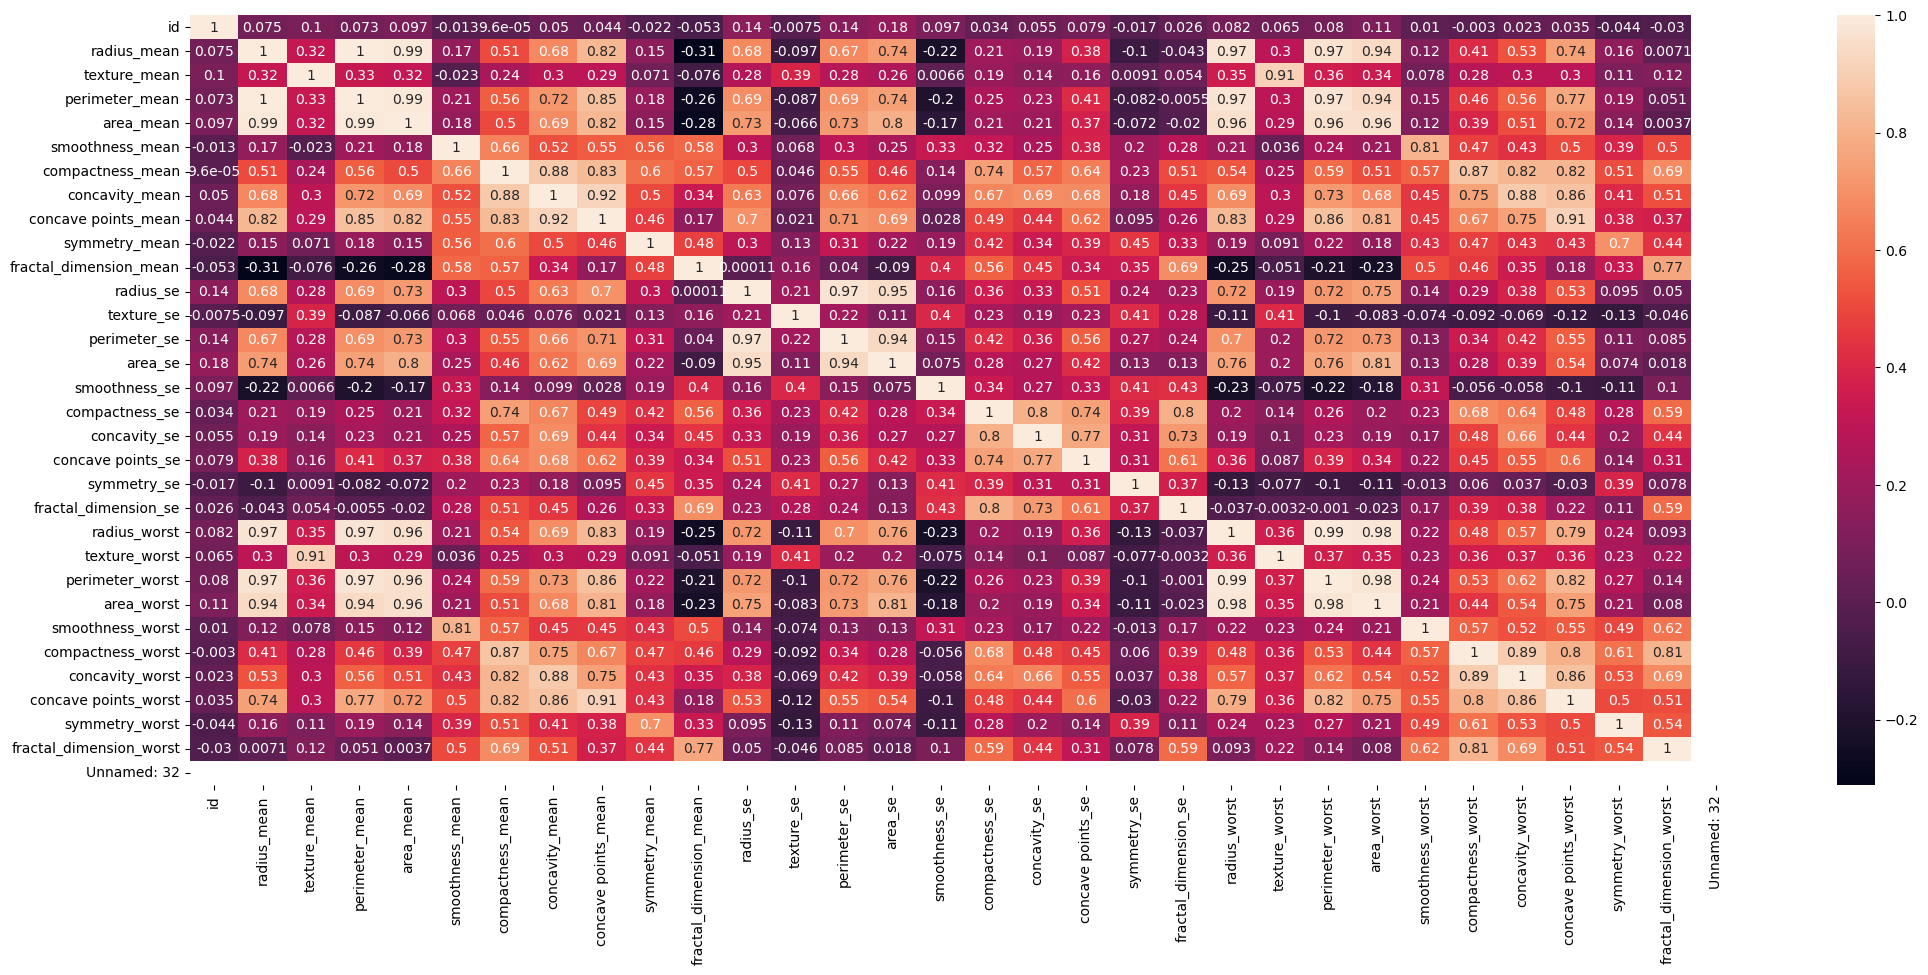

In [16]:
# correlation check

plt.figure(figsize=(25,10))
sns.heatmap(X.corr(), annot=True)

Observation: 
Quite some of our features are highly correlated such as mean_area and mean_radius, radius_se and area_se etc...

In [17]:
# finding highly correlated features

def correlation(dataset, threshold):
    col_corr=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if(col_matrix.iloc[i,j]>threshold):
                colname_1=col_matrix.columns[i]
                colname_2=col_matrix.columns[j]
                col_corr.add((colname_1, colname_2))

    return col_corr            

high_corr=correlation(X, 0.85)
high_corr    

{('area_mean', 'perimeter_mean'),
 ('area_mean', 'radius_mean'),
 ('area_se', 'perimeter_se'),
 ('area_se', 'radius_se'),
 ('area_worst', 'area_mean'),
 ('area_worst', 'perimeter_mean'),
 ('area_worst', 'perimeter_worst'),
 ('area_worst', 'radius_mean'),
 ('area_worst', 'radius_worst'),
 ('compactness_worst', 'compactness_mean'),
 ('concave points_mean', 'concavity_mean'),
 ('concave points_mean', 'perimeter_mean'),
 ('concave points_worst', 'concave points_mean'),
 ('concave points_worst', 'concavity_mean'),
 ('concave points_worst', 'concavity_worst'),
 ('concavity_mean', 'compactness_mean'),
 ('concavity_worst', 'compactness_worst'),
 ('concavity_worst', 'concavity_mean'),
 ('perimeter_mean', 'radius_mean'),
 ('perimeter_se', 'radius_se'),
 ('perimeter_worst', 'area_mean'),
 ('perimeter_worst', 'concave points_mean'),
 ('perimeter_worst', 'perimeter_mean'),
 ('perimeter_worst', 'radius_mean'),
 ('perimeter_worst', 'radius_worst'),
 ('radius_worst', 'area_mean'),
 ('radius_worst', 'p

In [18]:
features_to_remove = [
    'perimeter_mean',
    'area_mean',
    'area_se',
    'perimeter_se',
    'area_worst',
    'perimeter_worst',
    'concave points_worst',
    'concavity_worst',
    'compactness_worst',
    'texture_worst'
]


| Feature                 | Reason for Removal                                                                 |
|-------------------------|-------------------------------------------------------------------------------------|
| `perimeter_mean`        | Highly correlated with `radius_mean`; `radius_mean` is more direct and interpretable. |
| `area_mean`             | Strongly correlated with both `radius_mean` and `perimeter_mean`; redundant info.   |
| `area_se`               | Closely tied to `radius_se` and `perimeter_se`; drop to reduce redundancy.          |
| `perimeter_se`          | Correlates with `radius_se`; `radius_se` is more representative of spread.         |
| `area_worst`            | Redundant with `radius_worst` and `perimeter_worst`; adds no distinct information.  |
| `perimeter_worst`       | Correlates with `radius_mean` and `radius_worst`; radius-based features are kept.   |
| `concave points_worst`  | Highly correlated with `concave points_mean`; `mean` is more stable for modeling.   |
| `concavity_worst`       | Correlated with both `concavity_mean` and `concave points_worst`; `mean` retained.  |
| `compactness_worst`     | Redundant with `compactness_mean`; `mean` feature gives more consistent info.       |
| `texture_worst`         | Strongly correlated with `texture_mean`; worst values introduce more noise.         |


In [19]:
X_train.drop(columns=features_to_remove, axis=1, inplace=True)
X_test.drop(columns=features_to_remove, axis=1, inplace=True)
X.drop(columns=features_to_remove, axis=1, inplace=True)

In [20]:
X_train.head()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
326,89524,14.11,12.88,0.09309,0.05306,0.01765,0.02733,0.1373,0.05700,0.2571,...,0.01132,0.005717,0.006627,0.014160,0.002476,15.53,0.12810,0.2100,0.07083,NaN
13,846381,15.85,23.95,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,...,0.03126,0.050510,0.019920,0.029810,0.003002,16.84,0.11310,0.2809,0.06287,NaN
38,855133,14.99,25.20,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,...,0.01094,0.018180,0.019170,0.007882,0.001754,14.99,0.09387,0.1565,0.05504,NaN
135,868202,12.77,22.47,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,0.2367,...,0.01202,0.023320,0.008920,0.016470,0.002629,14.49,0.14190,0.2829,0.08067,NaN
492,914062,18.01,20.56,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,0.7548,...,0.02700,0.037370,0.016480,0.028970,0.003996,21.53,0.13090,0.3251,0.07625,NaN


In [21]:
X_test.head()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
155,8711003,12.25,17.94,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,...,0.01562,0.01994,0.007924,0.01799,0.002484,13.59,0.1217,0.3113,0.08132,NaN
541,921386,14.47,24.99,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,0.2542,...,0.04653,0.03829,0.011620,0.02068,0.006111,16.22,0.1340,0.3187,0.10230,NaN
202,878796,23.29,26.67,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,0.5539,...,0.05121,0.08958,0.024650,0.02175,0.005195,25.12,0.1536,0.3198,0.08762,NaN
409,905501,12.27,17.92,0.08685,0.06526,0.03211,0.02653,0.1966,0.05597,0.3342,...,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,0.1240,0.3455,0.06896,NaN
64,85922302,12.68,23.84,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,0.4255,...,0.02648,0.02973,0.012900,0.01635,0.003601,17.09,0.1851,0.3383,0.10310,NaN


#### Removing the Unnamed 32 column

In [22]:
X_train.drop(columns=['Unnamed: 32'], axis=1, inplace=True)
X_test.drop(columns=['Unnamed: 32'], axis=1, inplace=True)

#### Removing the ID column

In [23]:
X_train.drop(columns=['id'], axis=1, inplace=True)
X_test.drop(columns=['id'], axis=1, inplace=True)

<Axes: >

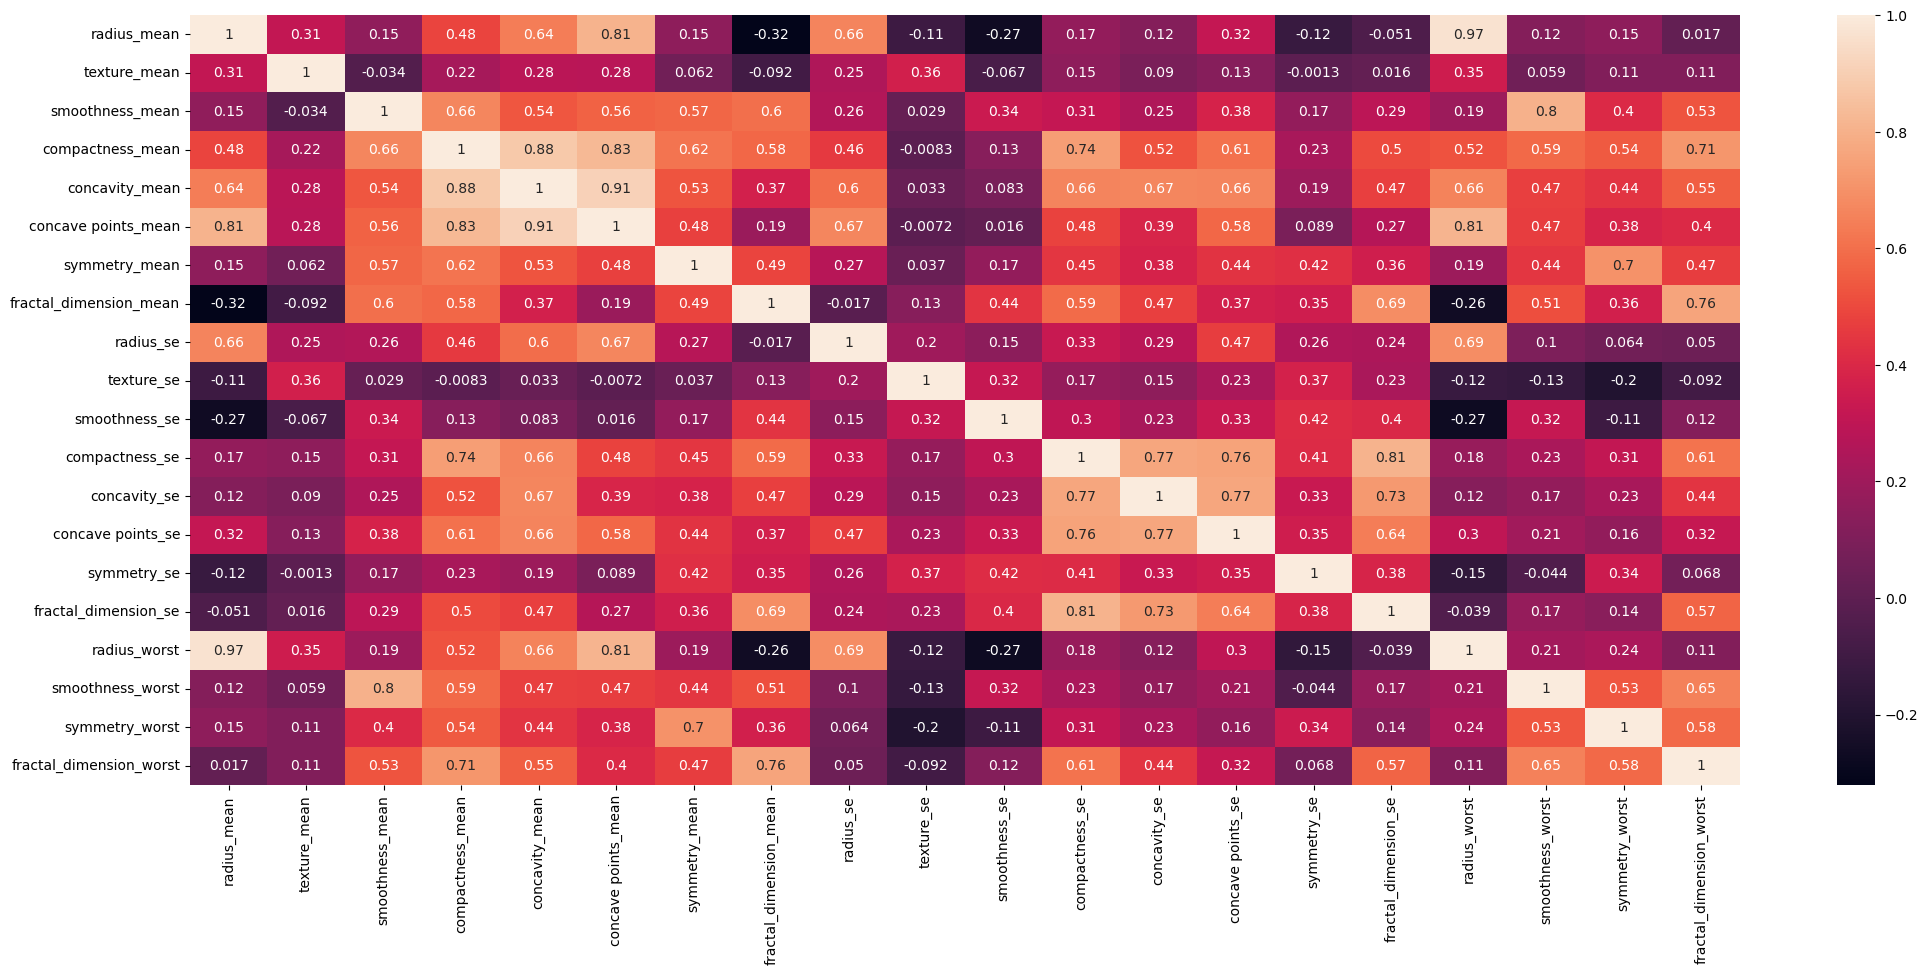

In [24]:
# new correlation matrix

plt.figure(figsize=(25,10))
sns.heatmap(X_train.corr(), annot=True)

In [25]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Scaling our Input Data

In [26]:
column_names=X_train.columns
column_names

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(data=scaler.fit_transform(X_train), columns=column_names)
X_test=pd.DataFrame(scaler.transform(X_test), columns=column_names)

In [28]:
X_test

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,-0.543491,-0.355060,-0.685203,-0.713137,-0.635977,-0.675427,0.643122,-0.083285,-0.686118,-0.449900,-0.520658,-0.559469,-0.374613,-0.625867,-0.284733,-0.490970,-0.563474,-0.454611,0.371024,-0.169404
1,0.104025,1.224228,-0.553492,0.359488,0.170487,-0.256788,0.273577,0.075861,-0.554547,-0.277110,0.071767,1.233211,0.209001,-0.023146,0.048475,0.852739,-0.003540,0.078322,0.491560,0.945508
2,2.676590,1.600569,1.298384,1.989129,3.437933,3.048826,1.510421,-0.081876,0.598427,0.582372,0.872272,1.504636,1.840261,2.101706,0.181015,0.513385,1.891294,0.927550,0.509478,0.165388
3,-0.537658,-0.359540,-0.662891,-0.742333,-0.723577,-0.588960,0.628038,-0.971964,-0.246779,0.977269,-0.385351,-0.125653,-0.353940,-0.165020,0.680207,-0.571363,-0.454894,-0.354957,0.928099,-0.826236
4,-0.418071,0.966614,1.161635,0.420552,0.325151,0.544239,0.398016,0.426544,0.104460,-0.100210,0.306909,0.070376,-0.063246,0.185588,-0.487879,-0.077151,0.181685,2.292379,0.810820,0.988021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.016965,0.852367,-0.228172,1.836470,1.635249,1.389306,-0.390095,1.523662,2.041087,0.412620,-0.064271,2.608894,1.087445,1.850572,-0.440809,2.775129,1.135490,-0.497939,-0.951624,2.013656
167,0.165277,0.135528,0.187834,-0.613717,-0.179782,0.110831,-0.804890,-0.514245,0.286043,0.010575,-0.447519,-0.791456,-0.373341,-0.109575,-0.766584,-0.638790,0.603233,0.615589,0.234198,-0.124765
168,0.217778,-0.579072,-0.490875,-0.637761,-0.706031,-0.528810,-0.853911,-0.822677,-0.367578,-1.010976,-0.433623,-0.499732,-0.544132,-0.567650,-0.591929,-0.608040,0.015621,-0.450278,-0.586755,-0.862903
169,0.392782,-1.710335,2.133276,0.979668,1.500080,1.644410,0.628038,1.101152,0.086764,-1.028844,-0.566370,-0.119274,0.359755,0.234510,-0.293404,0.132908,0.543620,0.905886,0.538798,0.876424


#### Exporting our Scaler

In [29]:
with open('/Users/adityabanerjee/Documents/Cancer /Exported Models/Best Model/scaler.pkl','wb') as f:
    pickle.dump(obj=scaler, file=f) 

### Exporting our Cleaned Data

In [30]:
y_train=pd.DataFrame(data=y_train, columns=['Diagnosis'])
y_test=pd.DataFrame(data=y_test, columns=['Diagnosis'])
training_data=pd.concat( [X_train,y_train], axis=1)
testing_data=pd.concat([X_test,y_test], axis=1)

In [31]:
training_data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,-0.000978,-1.488563,-0.213777,-0.975139,-0.911513,-0.567478,-1.608084,-0.826902,-0.543390,-0.273536,...,-0.808855,-0.826971,-0.837374,-0.759152,-0.493934,-0.150443,-0.177312,-1.279028,-0.726861,0
1,0.506535,0.991255,-0.867296,-0.075592,0.150732,0.139026,0.179306,-1.336731,0.019055,-0.278897,...,0.347600,0.597654,1.330367,1.179400,-0.299065,0.128460,-0.827231,-0.124155,-1.149868,1
2,0.255696,1.271271,-0.157638,-1.008533,-0.829242,-0.522902,-0.884078,-1.102942,3.137893,1.704524,...,-0.830894,-0.430590,1.208061,-1.536803,-0.761416,-0.265411,-1.660427,-2.150476,-1.565968,1
3,-0.391821,0.659717,-0.396590,-0.888313,-0.528622,-0.575265,-0.808661,-0.312849,-0.621871,0.260736,...,-0.768257,-0.267114,-0.463446,-0.473015,-0.437252,-0.371862,0.420613,-0.091577,-0.203947,1
4,1.136551,0.231853,0.290756,0.472074,0.379739,0.782963,1.193668,-0.295948,1.371308,0.096345,...,0.100534,0.179741,0.769393,1.075350,0.069187,1.126973,-0.055994,0.595808,-0.438833,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.865294,1.708095,0.210146,0.130499,0.167888,0.425549,-0.024321,-0.008641,2.041857,-0.146669,...,-0.178430,-0.143394,0.459552,0.019985,0.225156,1.431424,1.204848,0.203249,0.323750,1
394,1.856986,0.433464,-0.900404,-0.394650,0.034278,0.315720,-1.253623,-1.563478,1.112014,-0.345011,...,0.351660,0.345125,0.806900,-0.852054,0.045847,1.699682,-0.406950,-1.054243,-0.703478,1
395,-0.663078,-0.184810,1.068069,0.905246,0.442124,0.090154,1.891278,2.129260,0.323745,-0.364666,...,0.514631,0.328587,-0.215573,0.302406,0.688249,0.124201,1.365162,3.055411,2.959578,1
396,-0.709745,-0.751562,1.204819,-0.220046,-0.584769,-0.460334,0.201931,0.160363,-0.104052,-0.143095,...,-0.716060,-0.420094,-0.014993,0.152525,-0.220895,-0.620958,0.884222,-0.132299,-0.226797,0


In [32]:
testing_data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,-0.543491,-0.355060,-0.685203,-0.713137,-0.635977,-0.675427,0.643122,-0.083285,-0.686118,-0.449900,...,-0.559469,-0.374613,-0.625867,-0.284733,-0.490970,-0.563474,-0.454611,0.371024,-0.169404,0
1,0.104025,1.224228,-0.553492,0.359488,0.170487,-0.256788,0.273577,0.075861,-0.554547,-0.277110,...,1.233211,0.209001,-0.023146,0.048475,0.852739,-0.003540,0.078322,0.491560,0.945508,0
2,2.676590,1.600569,1.298384,1.989129,3.437933,3.048826,1.510421,-0.081876,0.598427,0.582372,...,1.504636,1.840261,2.101706,0.181015,0.513385,1.891294,0.927550,0.509478,0.165388,1
3,-0.537658,-0.359540,-0.662891,-0.742333,-0.723577,-0.588960,0.628038,-0.971964,-0.246779,0.977269,...,-0.125653,-0.353940,-0.165020,0.680207,-0.571363,-0.454894,-0.354957,0.928099,-0.826236,0
4,-0.418071,0.966614,1.161635,0.420552,0.325151,0.544239,0.398016,0.426544,0.104460,-0.100210,...,0.070376,-0.063246,0.185588,-0.487879,-0.077151,0.181685,2.292379,0.810820,0.988021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.016965,0.852367,-0.228172,1.836470,1.635249,1.389306,-0.390095,1.523662,2.041087,0.412620,...,2.608894,1.087445,1.850572,-0.440809,2.775129,1.135490,-0.497939,-0.951624,2.013656,1
167,0.165277,0.135528,0.187834,-0.613717,-0.179782,0.110831,-0.804890,-0.514245,0.286043,0.010575,...,-0.791456,-0.373341,-0.109575,-0.766584,-0.638790,0.603233,0.615589,0.234198,-0.124765,1
168,0.217778,-0.579072,-0.490875,-0.637761,-0.706031,-0.528810,-0.853911,-0.822677,-0.367578,-1.010976,...,-0.499732,-0.544132,-0.567650,-0.591929,-0.608040,0.015621,-0.450278,-0.586755,-0.862903,0
169,0.392782,-1.710335,2.133276,0.979668,1.500080,1.644410,0.628038,1.101152,0.086764,-1.028844,...,-0.119274,0.359755,0.234510,-0.293404,0.132908,0.543620,0.905886,0.538798,0.876424,1


In [33]:
training_data.to_csv('/Users/adityabanerjee/Documents/Cancer /Datasets/Cleaned/cleaned_testing_data.csv')
testing_data.to_csv('/Users/adityabanerjee/Documents/Cancer /Datasets/Cleaned/cleaned_training_data.csv')